# **Import Library**

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# **Data Preparation**

In [2]:
# Load data to Dataframe
df = pd.read_csv('/content/DQLab_Bike Sales.csv', sep=',')
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# **Data Cleansing**

In [3]:
# Remove any rows with missing values
df.replace(['NaN', 'N/A', 'NA', 'n/a', 'n.a.', 'N#A', 'n#a', '?'], 'other', inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [5]:
print(df.isnull().sum())

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


**as we have seen, the data has no missing values**

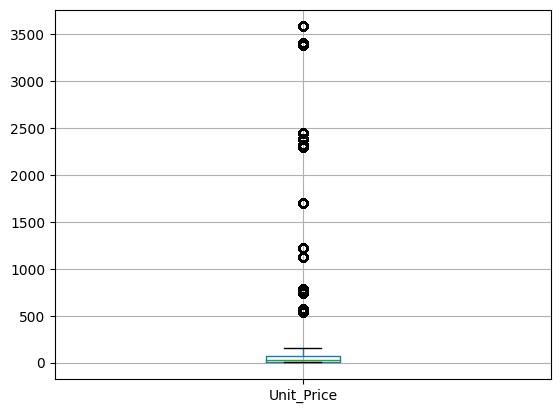

In [6]:
# Check for outlier with bloxplot
df.boxplot(column='Unit_Price')
plt.show()

In [7]:
df['Unit_Price'].describe()

count    113036.000000
mean        452.938427
std         922.071219
min           2.000000
25%           5.000000
50%          24.000000
75%          70.000000
max        3578.000000
Name: Unit_Price, dtype: float64

**The boxplot reveals that the unit price from the Bike Sales in Europe dataset exhibits a considerable range with several outliers. This suggests that there may be several factors influencing the unit bike prices, such as brand, bike type, additional features, and others. Additionally, property owners also have the discretion to set varying prices.**

# **Export Data**

In [8]:
df.to_csv('/datalab/DQLab_Bike Sales.csv', index=False)

#**Exploratory Data Analysis**

### **Problem Identification**

1. Which country has the most sales and generates the most profit ?
2. Which country and state is the most suitable for bike sales with maximum profit?
3. What product category is most in demand and generate maximum profit ?

### **1. Which country has the most sales and generates the most profit ?**

In [122]:
# Number of buyer in each country
n_buy = df.groupby(['Country', 'State'])['Order_Quantity'].count().reset_index()
n_buy.columns = ['Country', 'State', 'Total_Buyer']
n_buy = n_buy.sort_values(by='Total_Buyer', ascending=False).head(10)
n_buy

,Country,State,Total_Buyer
33,United States,California,22450
6,Canada,British Columbia,14116
30,United Kingdom,England,13620
51,United States,Washington,11264
0,Australia,New South Wales,10412
4,Australia,Victoria,6016
46,United States,Oregon,5286
1,Australia,Queensland,5220
29,Germany,Saarland,2770
28,Germany,Nordrhein-Westfalen,2484


In [123]:
# Analyze Buyer by Country
sales_by_country = df.groupby('Country')['Order_Quantity'].count().reset_index()
sales_by_country.columns = ['Country', 'Total_Buyer']
sales_by_country = sales_by_country.sort_values(by='Total_Buyer', ascending=False).head(5)
sales_by_country

,Country,Total_Buyer
5,United States,39206
0,Australia,23936
1,Canada,14178
4,United Kingdom,13620
3,Germany,11098


<ipython-input-125-9c5ad1a68ba5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


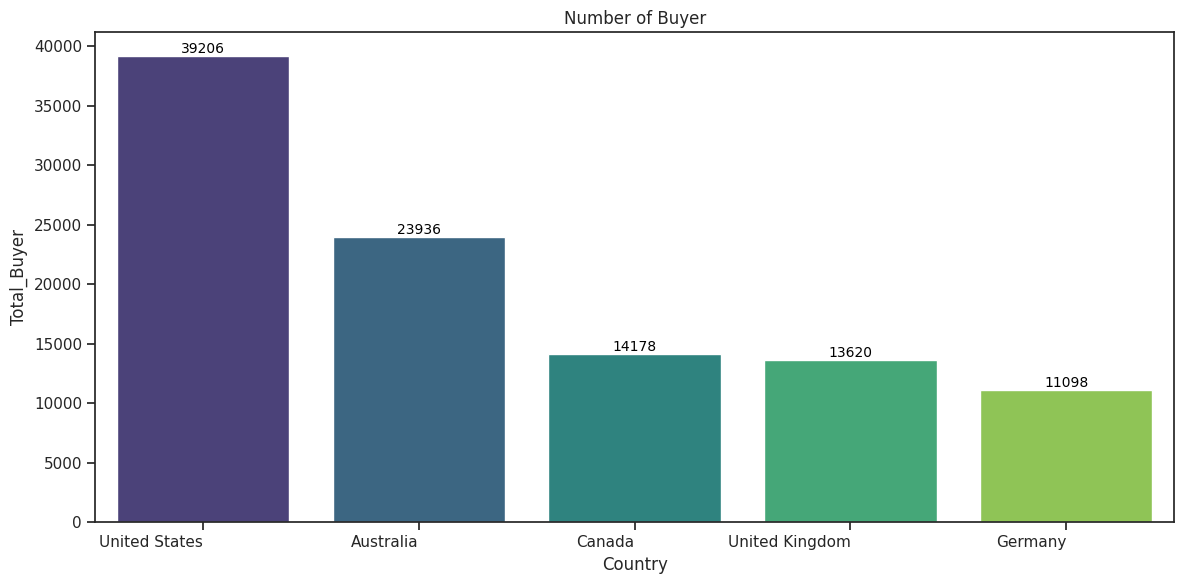

In [125]:
# Create a bar chart for Number of Buyer by Country
plt.figure(figsize=(12, 6))
sales_by_country_reset = sales_by_country.reset_index()
sns.barplot(
    x=sales_by_country_reset['Country'],
    y=sales_by_country_reset['Total_Buyer'],
    palette='viridis'
)

for i, v in enumerate(sales_by_country_reset['Total_Buyer']):
    plt.text(i, v + 0.1, f"{v:.0f}", ha='center', va='bottom', color='black', fontsize=10)

plt.title('Number of Buyer')
plt.xlabel('Country')
plt.ylabel('Total_Buyer')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

In [126]:
# Buyer Trends by Country
df['Year'] = pd.to_datetime(df['Date']).dt.year
df_grouped_time = df.groupby(['Country', 'Year'])['Order_Quantity'].count().reset_index()
df_grouped_time_sorted = df_grouped_time.sort_values(by=['Country', 'Year'], ascending=False)

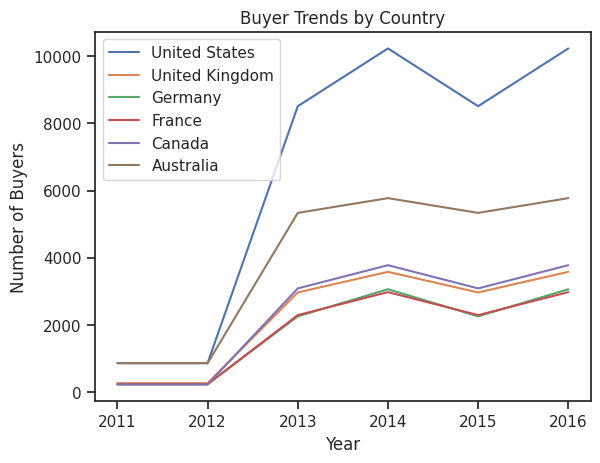

In [127]:
# Visualize Buyer Trends by Country
for country in df_grouped_time_sorted['Country'].unique():
    country_data = df_grouped_time_sorted[df_grouped_time_sorted['Country'] == country]
    plt.plot(country_data["Year"], country_data['Order_Quantity'], label=country)

plt.xlabel('Year')
plt.ylabel('Number of Buyers')
plt.title('Buyer Trends by Country')
plt.legend()
plt.show()

### **2. Which country and state is the most suitable for bike sales with maximum profit?**

In [138]:
# Number of buyer by state
df_us = df[df['Country'] == 'United States']
df_us['Number_of_Buyers'] = df_us['Order_Quantity']
df_grouped_state = df_us.groupby('State')['Number_of_Buyers'].sum().reset_index()
df_grouped_state_sorted = df_grouped_state.sort_values(by='Number_of_Buyers', ascending=False)


<ipython-input-138-6ae76a967ddf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['Number_of_Buyers'] = df_us['Order_Quantity']


In [131]:
df_grouped_state_sorted

,State,Number_of_Buyers
2,California,269759
20,Washington,137947
15,Oregon,67012
14,Ohio,572
17,Texas,330
5,Illinois,299
12,New York,276
8,Minnesota,131
6,Kentucky,130
18,Utah,126


<ipython-input-143-356ad71d17cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='State', x='Number_of_Buyers', data=df_grouped_state_sorted, palette='bright')


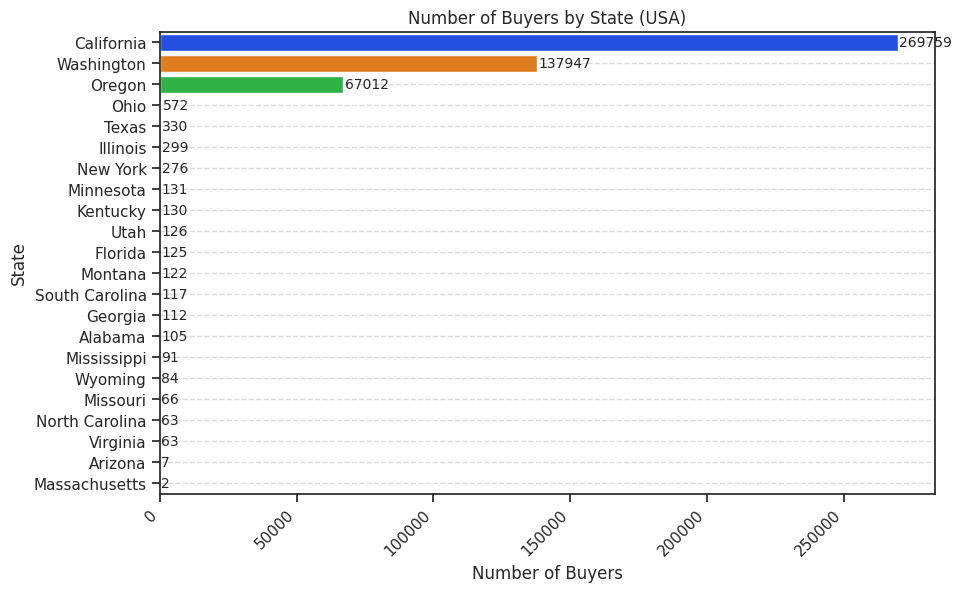

In [143]:
# Visualize Number of buyer by state
plt.figure(figsize=(10, 6))
ax = sns.barplot(y='State', x='Number_of_Buyers', data=df_grouped_state_sorted, palette='bright')

plt.xlabel('Number of Buyers')
plt.ylabel('State')
plt.title('Number of Buyers by State (USA)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, val in enumerate(df_grouped_state_sorted['Number_of_Buyers']):
    plt.text(val + 500, i, str(val), ha='left', va='center', fontsize=10)

plt.show()

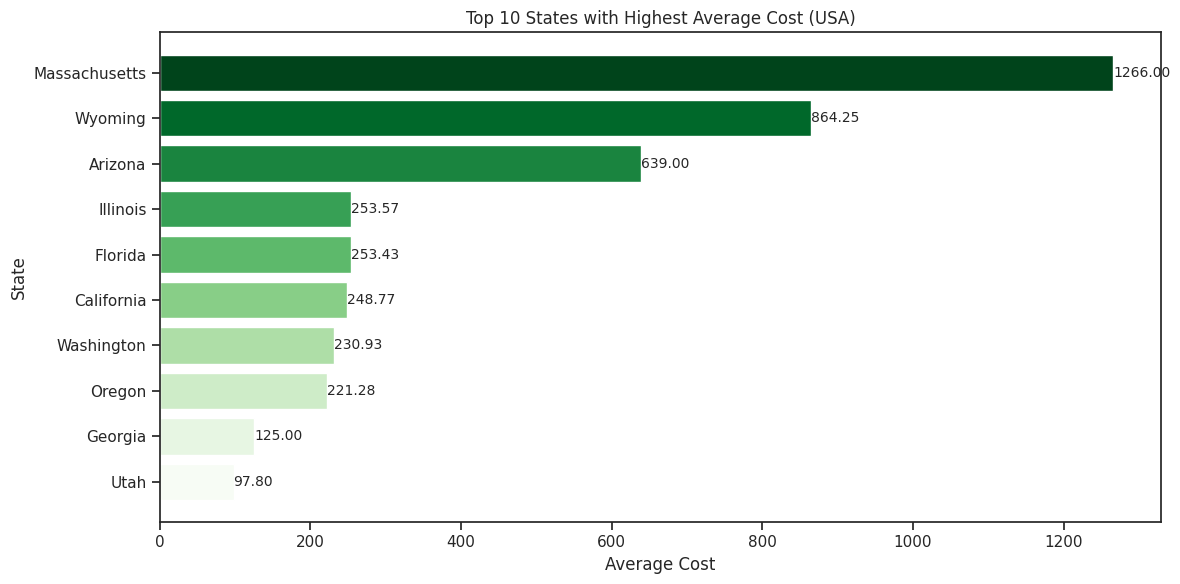

Average cost in USA: 239.35055858797122


In [175]:
# Top 10 state with highest average cost in USA
df_us = df[df['Country'] == 'United States']
df_avg_price_state = df_us.groupby('State')['Unit_Cost'].mean().reset_index()
df_avg_price_state_sorted = df_avg_price_state.sort_values(by='Unit_Cost', ascending=False)


top_10_states = df_avg_price_state_sorted.head(10)
avg_price_us = df_us['Unit_Cost'].mean()

# Visualize Top 10 state with highest average cost in USA
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_states['State'], top_10_states['Unit_Cost'], color=plt.cm.Greens(np.linspace(1, 0, len(top_10_states))))

for i, bar in enumerate(bars):
    label = f"{bar.get_width():.2f}"
    xval = bar.get_width() + 0.1
    yval = bar.get_center()[1]
    plt.text(xval, yval, label, ha='left', va='center', fontsize=10)

plt.xlabel('Average Cost')
plt.ylabel('State')
plt.title('Top 10 States with Highest Average Cost (USA)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Average cost in USA:", avg_price_us)

### **3. What product category is most in demand and generate maximum profit ?**

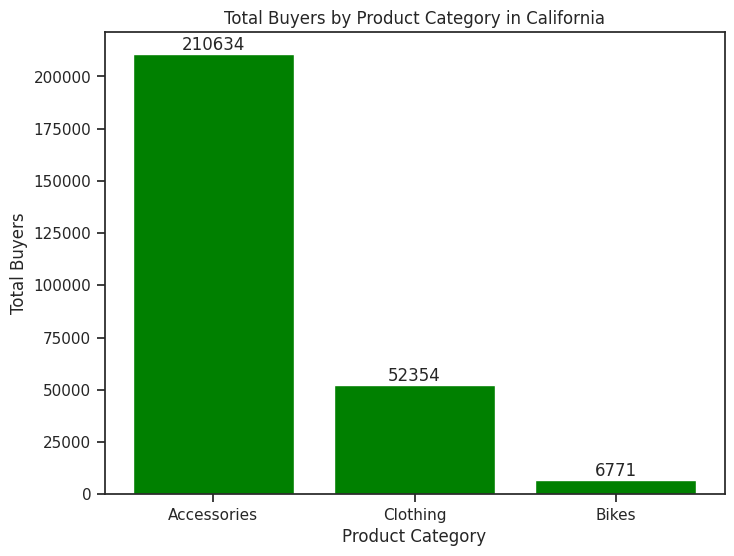

In [205]:
# Total buyer by product category
df_ca = df[(df['Country'] == 'United States') & (df['State'] == 'California')]
df_ca_product = df_ca.groupby('Product_Category')['Order_Quantity'].sum().reset_index()
df_ca_product = df_ca_product.sort_values('Order_Quantity', ascending=False)

# Visualize Total buyer by product category
plt.figure(figsize=(8, 6))
bars = plt.bar(df_ca_product['Product_Category'], df_ca_product['Order_Quantity'], color='green')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom')

plt.xlabel('Product Category')
plt.ylabel('Total Buyers')
plt.title('Total Buyers by Product Category in California')
plt.xticks(rotation=0)
plt.show()

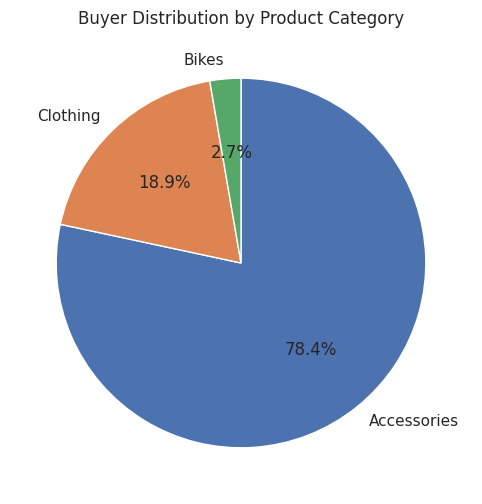

In [196]:
# Buyer distribution by product category
df_product = df.groupby('Product_Category')['Order_Quantity'].sum().reset_index()
df_product = df_product.sort_values('Order_Quantity', ascending=False)

# Visualize Buyer distribution by product category
plt.figure(figsize=(8, 6))
plt.pie(df_product['Order_Quantity'], labels=df_product['Product_Category'], autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Buyer Distribution by Product Category')
plt.show()

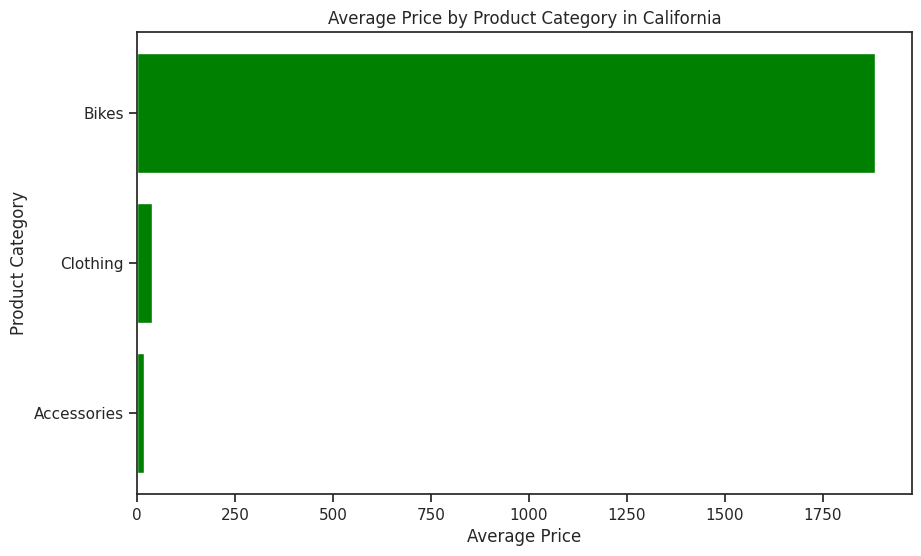

In [228]:
# Average proce by product category
df_ca = df[df['State'] == 'California']
df_avg_price = df_ca.groupby('Product_Category')['Unit_Price'].mean().reset_index()
df_avg_price = df_avg_price.sort_values('Unit_Price', ascending=True)

# Visualize Average proce by product category
plt.figure(figsize=(10, 6))
plt.barh(df_avg_price['Product_Category'], df_avg_price['Unit_Price'], color='green')

plt.title('Average Price by Product Category in California')
plt.xlabel('Average Price')
plt.ylabel('Product Category')
plt.show()

In [225]:
df_avg_price.columns = ['Product_Category', 'Average_Price']
df_avg_price

,Product_Category,Average_Price
0,Accessories,17.139551
2,Clothing,37.559817
1,Bikes,1882.531224
